# Analisando dados do clima com R

In [1]:
# carregando dados
dados <- read.csv('../data/tempo.csv', sep=';', na.strings = '', stringsAsFactors = T)

## exploração 

In [2]:
# visualizando os dados
head(dados)

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<int>,<int>,<fct>,<fct>
1,sol,85,85,FALSO,nao
2,sol,80,90,VERDADEIRO,nao
3,nublado,83,86,FALSO,sim
4,chuva,70,NA,FALSO,sim
5,chuva,68,80,FALSO,sim
6,chuva,65,70,VERDADEIRO,nao


In [3]:
# visualisando as estruturas das variaveis e tipos de dados
str(dados)

'data.frame':	14 obs. of  5 variables:
 $ Aparencia  : Factor w/ 4 levels "chuva","menos",..: 4 4 3 1 1 1 2 4 4 1 ...
 $ Temperatura: int  85 80 83 70 68 65 64 1220 69 75 ...
 $ Umidade    : int  85 90 86 NA 80 70 65 95 70 200 ...
 $ Vento      : Factor w/ 2 levels "FALSO","VERDADEIRO": 1 2 1 1 1 2 2 1 1 NA ...
 $ Jogar      : Factor w/ 2 levels "nao","sim": 1 1 2 2 2 1 2 1 2 2 ...


In [4]:
# resumo dos dados sumarizados
summary(dados)

   Aparencia  Temperatura         Umidade              Vento   Jogar  
 chuva  :5   Min.   :  64.00   Min.   : 65.00   FALSO     :7   nao:5  
 menos  :1   1st Qu.:  69.25   1st Qu.: 70.00   VERDADEIRO:6   sim:9  
 nublado:3   Median :  73.50   Median : 85.00   NA's      :1          
 sol    :5   Mean   : 155.57   Mean   : 89.77                         
             3rd Qu.:  80.75   3rd Qu.: 90.00                         
             Max.   :1220.00   Max.   :200.00                         
                               NA's   :1                              

In [5]:
# identificando valores ausentes
dados[!complete.cases(dados),]

# quantidade de valores ausentes
sum(is.na(dados))

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<int>,<int>,<fct>,<fct>
4,chuva,70,NA,FALSO,sim
10,chuva,75,200,NA,sim


[1] 2

## tratamento de atributos

**Regras de negócio:**
- Aparencia: sol, chuva, nublado
- Temperatura: -130 a 130
- Umidade: 0 a 100
- Jogar: sim, nao

### aparencia

Regras: sol, chuva, nublado'

In [6]:
# tratando a variavel Aparencia conforme as regras de negocio
dados[!dados$Aparencia %in% c('sol','nublado','chuva'),]

# sumarizando os dados para opçoes de tratamento 
summary(dados$Aparencia)

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<int>,<int>,<fct>,<fct>
7,menos,64,65,VERDADEIRO,sim


chuva   menos nublado     sol 
      5       1       3       5

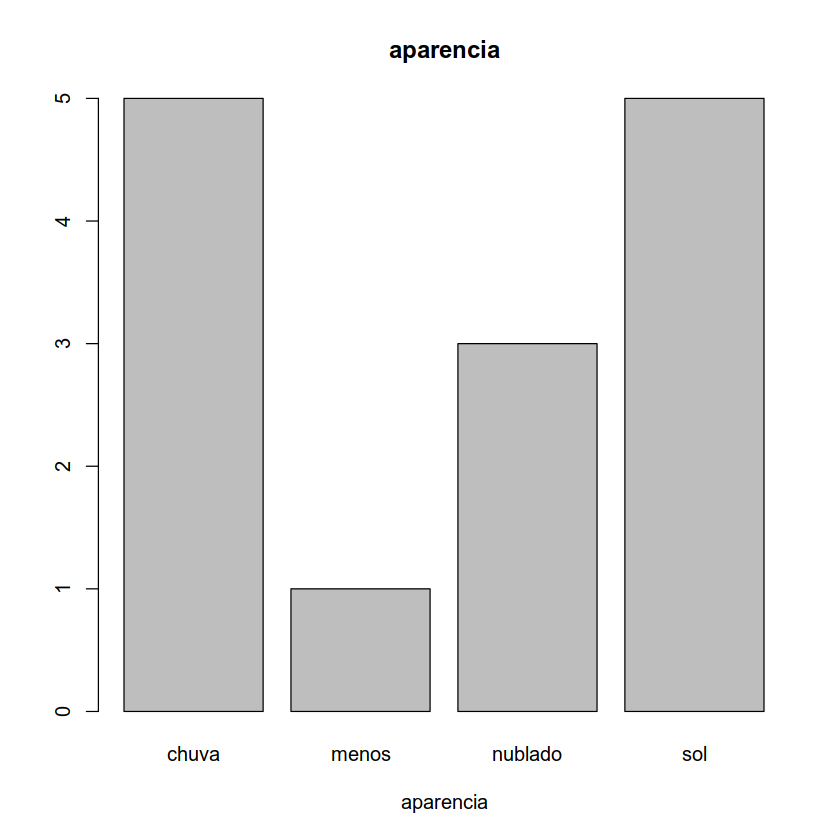

In [7]:
# visualizando os dados
counts <- table(dados$Aparencia)
barplot(counts, main='aparencia', xlab='aparencia')

In [8]:
# removendo dados fora do dominio
dados2 <- dados[dados$Aparencia %in% c('sol','nublado','chuva'),]

# removendo fatores nao utilizados
dados2$Aparencia <- factor(dados2$Aparencia)

# visualizando os dados
head(dados2)

# visualizando dados sumarizados
summary(dados2)

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<int>,<int>,<fct>,<fct>
1,sol,85,85,FALSO,nao
2,sol,80,90,VERDADEIRO,nao
3,nublado,83,86,FALSO,sim
4,chuva,70,NA,FALSO,sim
5,chuva,68,80,FALSO,sim
6,chuva,65,70,VERDADEIRO,nao


   Aparencia  Temperatura        Umidade              Vento   Jogar  
 chuva  :5   Min.   :  65.0   Min.   : 70.00   FALSO     :7   nao:5  
 nublado:3   1st Qu.:  70.0   1st Qu.: 73.75   VERDADEIRO:5   sim:8  
 sol    :5   Median :  75.0   Median : 85.50   NA's      :1          
             Mean   : 162.6   Mean   : 91.83                         
             3rd Qu.:  81.0   3rd Qu.: 90.25                         
             Max.   :1220.0   Max.   :200.00                         
                              NA's   :1                              

### temperatura

Regras: -130 a 130

In [9]:
# filtrando dados fora do dominio de temperatura
dados2[dados2$Temperatura < -130 | dados2$Temperatura > 130,]

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<int>,<int>,<fct>,<fct>
8,sol,1220,95,FALSO,nao


In [10]:
# dados sumarizados para avaliar opçoes para o tratamento
summary(dados2$Temperatura)

# dados sem outlier
summary(dados2[!dados2$Temperatura==1220.0,]$Temperatura)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   65.0    70.0    75.0   162.6    81.0  1220.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   69.75   73.50   74.50   80.25   85.00 

In [11]:
# substituindo dados fora do dominio pela mediana
dados2[dados2$Temperatura < -130 | dados2$Temperatura > 130,]$Temperatura <- median(dados2[!dados2$Temperatura==1220.0,]$Temperatura, na.rm = T)

# visualizando alteraçoes 
summary(dados2$Temperatura)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   70.00   73.50   74.42   80.00   85.00 

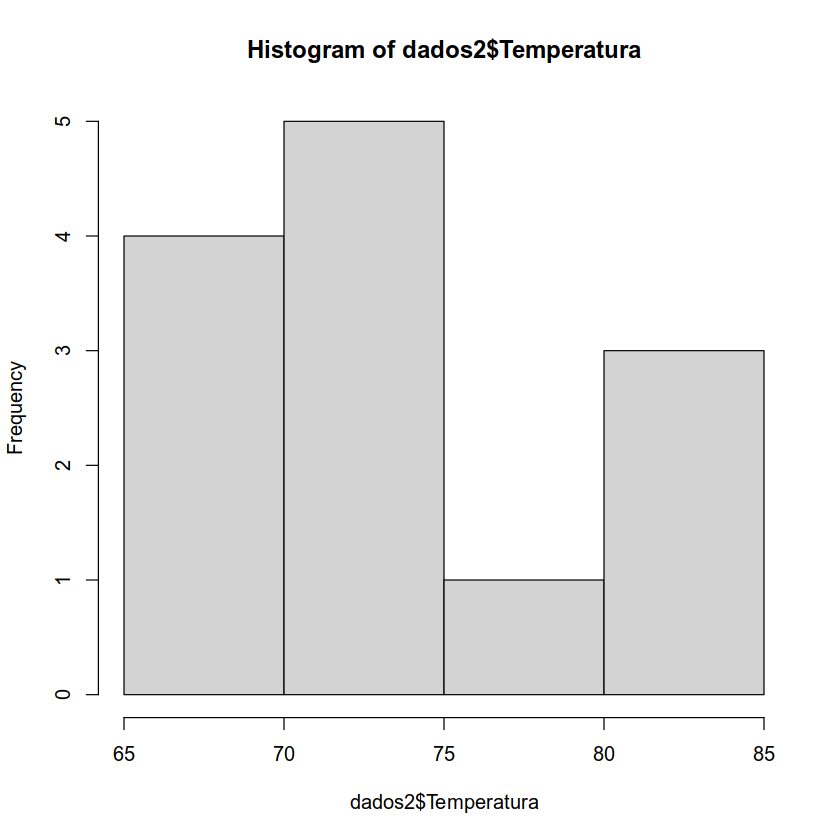

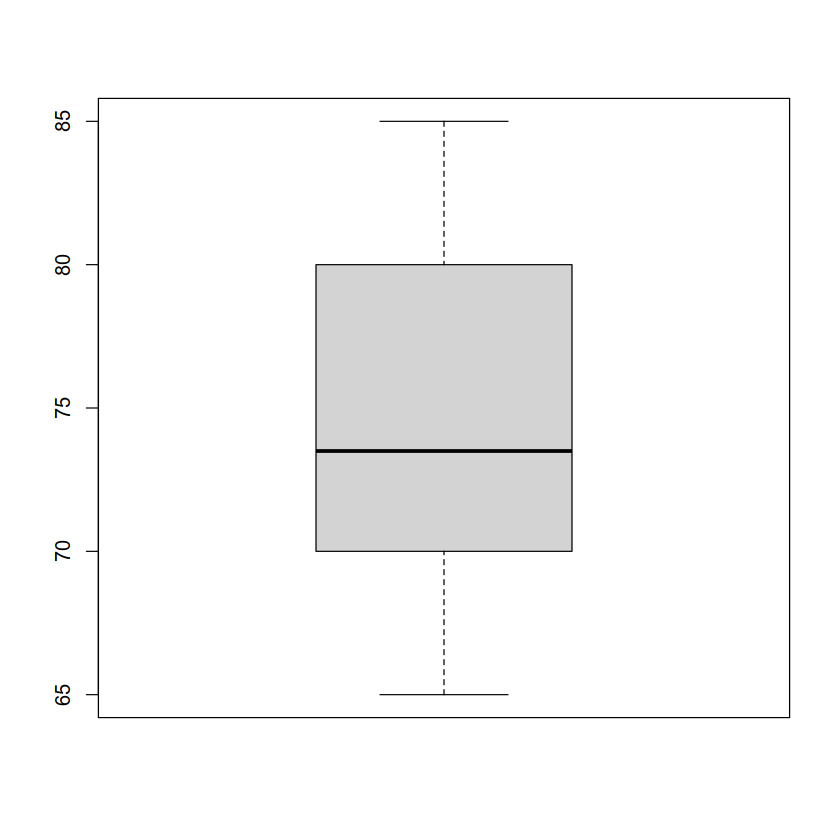

In [12]:
# visualizando estatisticas do atributo tratado
hist(dados2$Temperatura)
boxplot(dados2$Temperatura)

### umidade

Regras: 0 a 100

In [13]:
# filtrando dados fora do dominio de umidade
dados2[dados2$Umidade < 0 | dados2$Umidade > 100 | is.na(dados2$Umidade),]

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<dbl>,<int>,<fct>,<fct>
4,chuva,70,NA,FALSO,sim
10,chuva,75,200,NA,sim


In [14]:
# dados sumarizados para avaliar opçoes para o tratamento
summary(dados2$Umidade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  70.00   73.75   85.50   91.83   90.25  200.00       1 

In [15]:
# substituindo NAs pela mediana
dados2[dados2$Umidade < 0 | dados2$Umidade > 100 | is.na(dados2$Umidade),]$Umidade <- median(dados$Umidade, na.rm=T)

# visualizando alteraçoes   
summary(dados2$Umidade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.00   75.00   85.00   82.46   90.00   95.00 

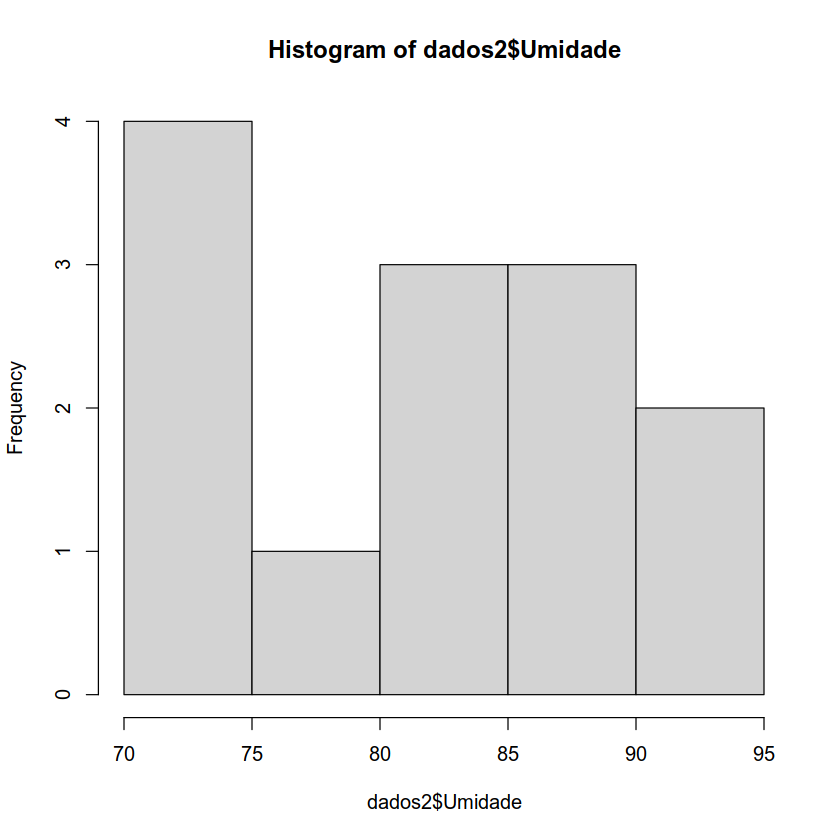

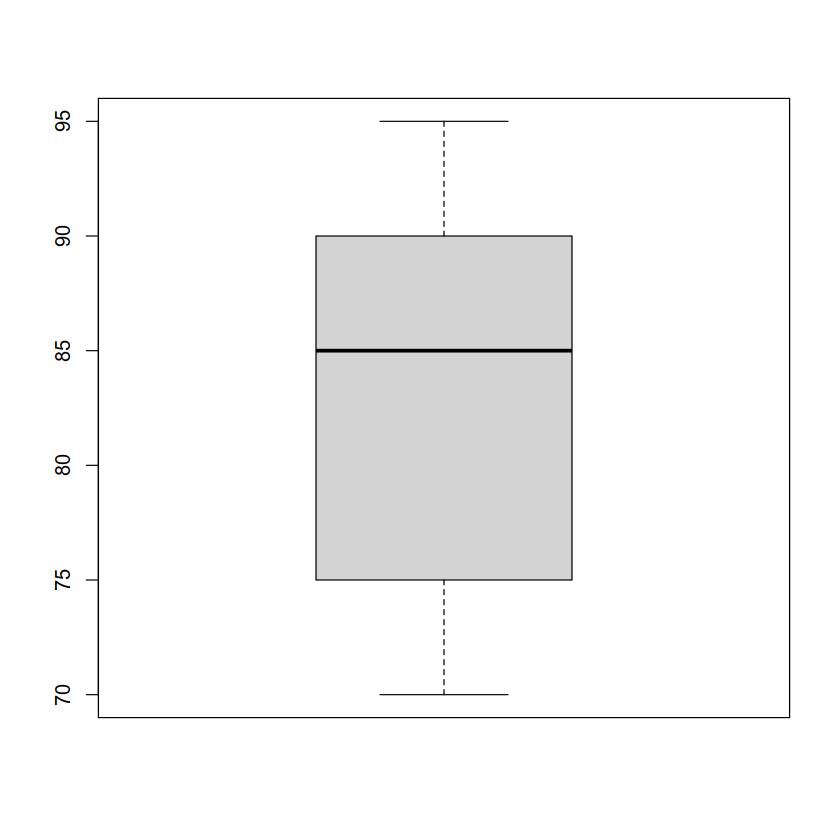

In [16]:
# visualizando estatisticas do atributo tratado
hist(dados2$Umidade)
boxplot(dados2$Umidade)

### vento

FALSO VERDADEIRO       NA's 
         7          5          1

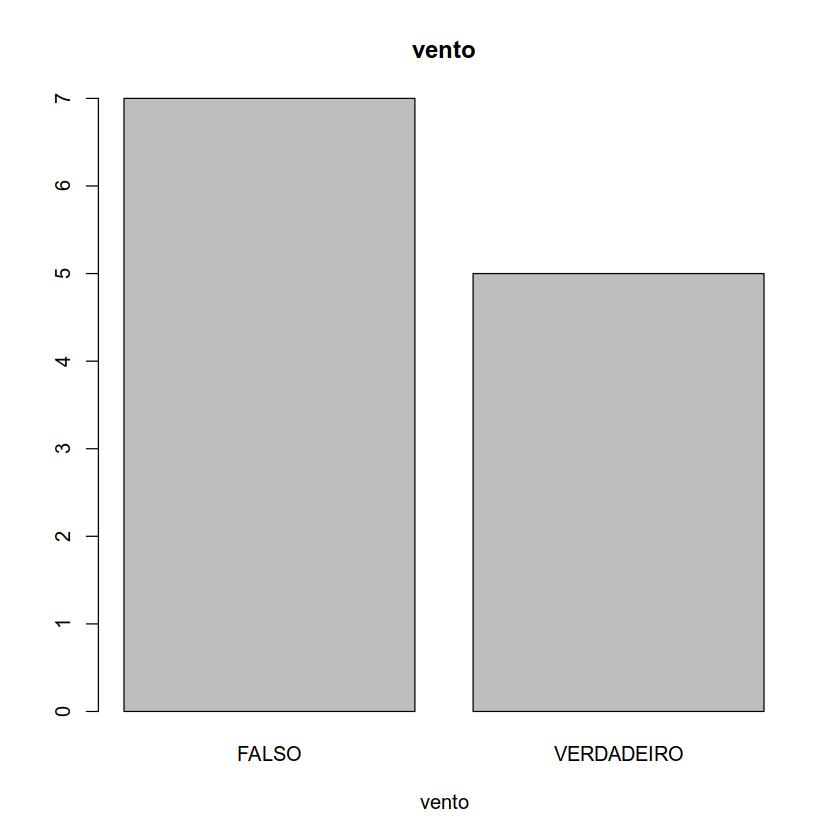

In [17]:
# visualizando dados sumarizados do atributo vento
summary(dados2$Vento)

# visualizando os dados do atributo vento
counts <- table(dados2$Vento)
barplot(counts, main='vento', xlab='vento')

In [18]:
# substituindo NAs do atributo vento pela moda
dados2[is.na(dados2$Vento),]$Vento <- 'FALSO'

# visualizando alteraçoes
summary(dados2$Vento)


FALSO VERDADEIRO 
         8          5

### jogar

**Regras:** sim, nao

In [19]:
# filtrando dados NAs ou fora do dominio de jogar
dados2[!dados2$Jogar %in% c('nao','sim') | is.na(dados2$Jogar),]


Aparencia,Temperatura,Umidade,Vento,Jogar
<fct>,<dbl>,<int>,<fct>,<fct>


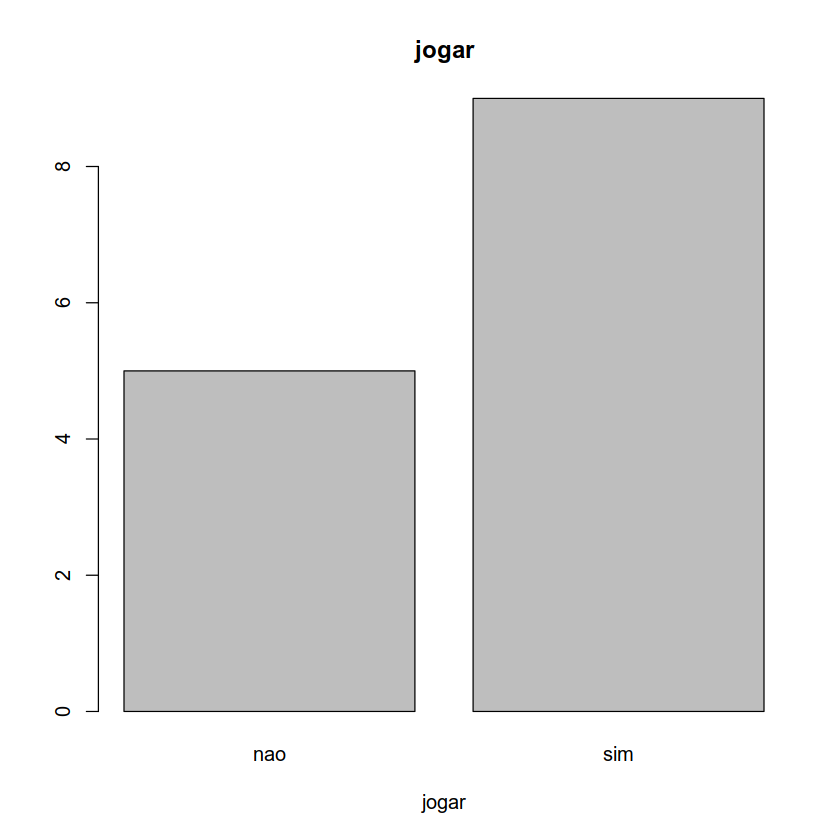

In [20]:
# visualizando dados fora do dominio de jogar
counts <- table(dados$Jogar)
barplot(counts, main='jogar', xlab='jogar')

## Analise estatistica descritiva

In [21]:
# visualizando os dados
head(dados2)

,Aparencia,Temperatura,Umidade,Vento,Jogar
,<fct>,<dbl>,<int>,<fct>,<fct>
1,sol,85,85,FALSO,nao
2,sol,80,90,VERDADEIRO,nao
3,nublado,83,86,FALSO,sim
4,chuva,70,85,FALSO,sim
5,chuva,68,80,FALSO,sim
6,chuva,65,70,VERDADEIRO,nao


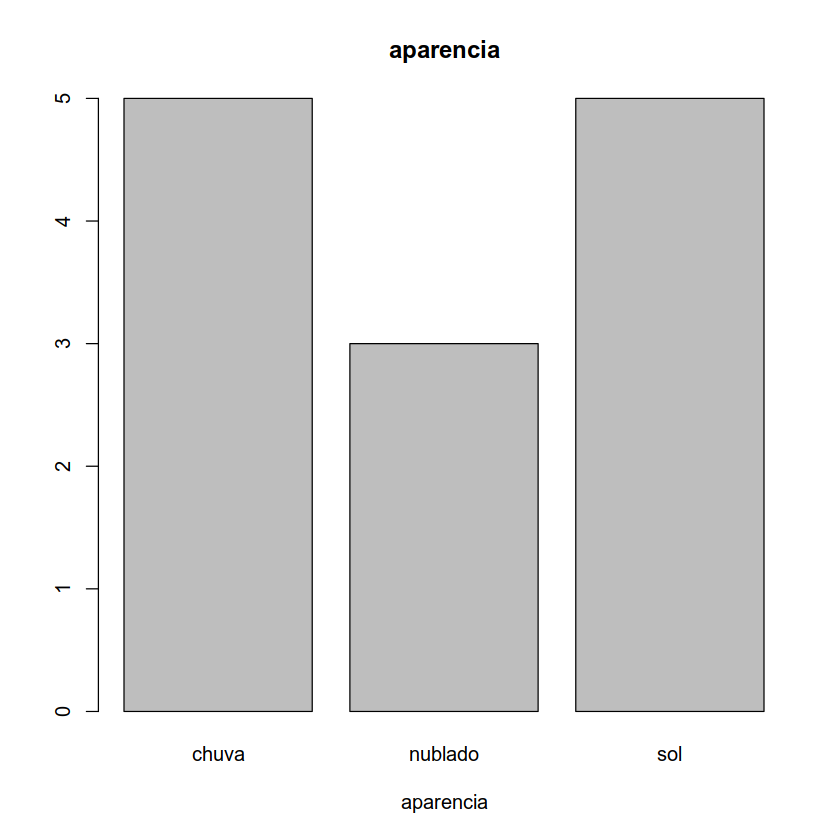

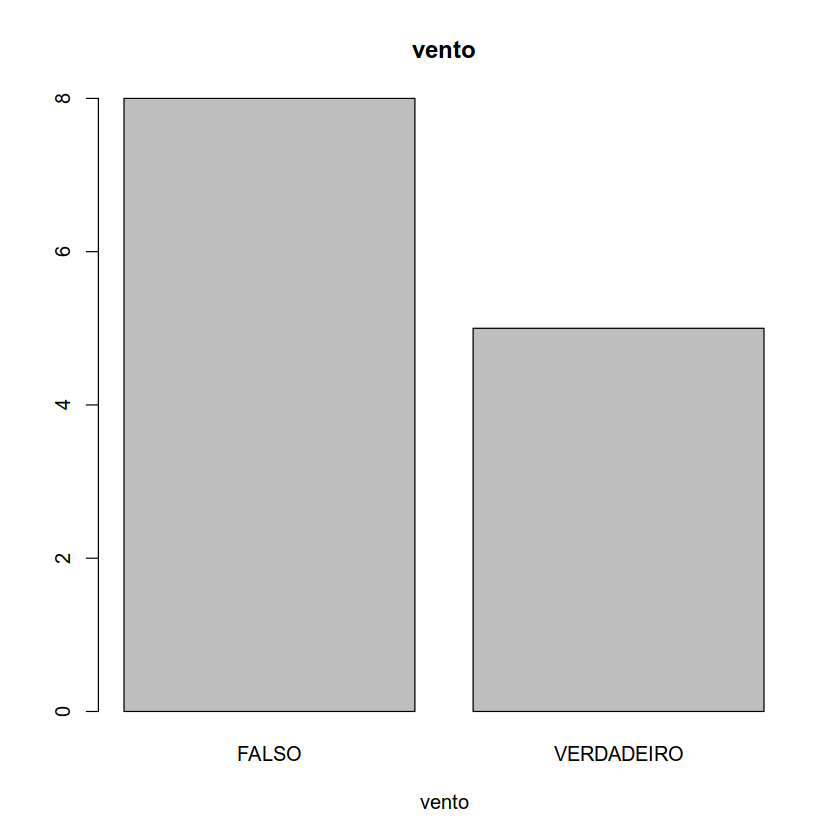

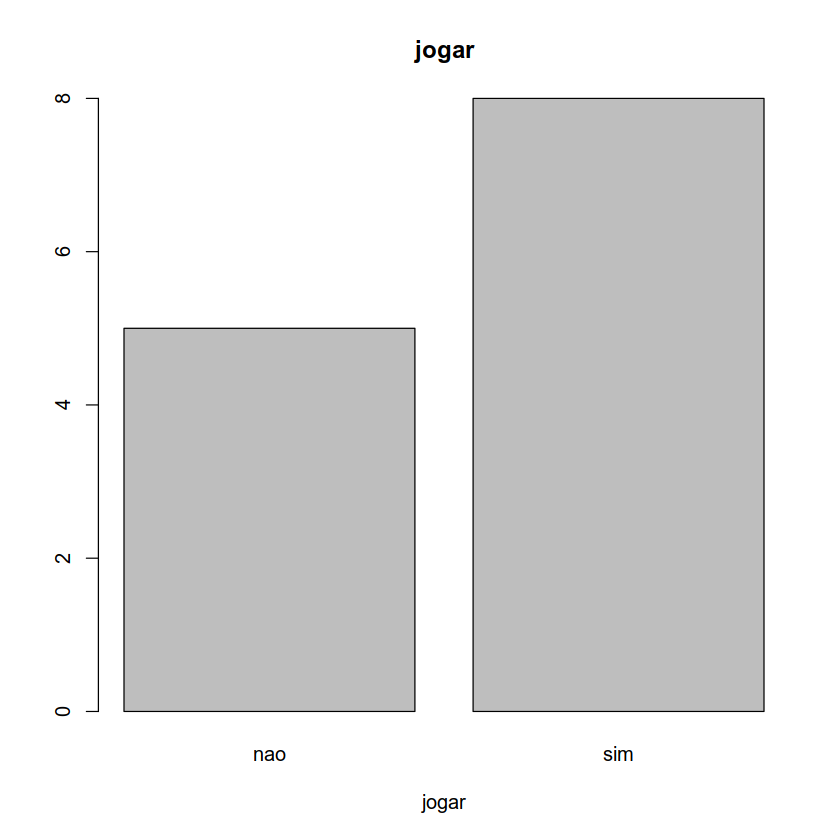

In [22]:
# visualizando a frequencia dos atributos categoricos
barplot(table(dados2$Aparencia), main='aparencia', xlab='aparencia')
barplot(table(dados2$Vento), main='vento', xlab='vento')
barplot(table(dados2$Jogar), main='jogar', xlab = 'jogar')

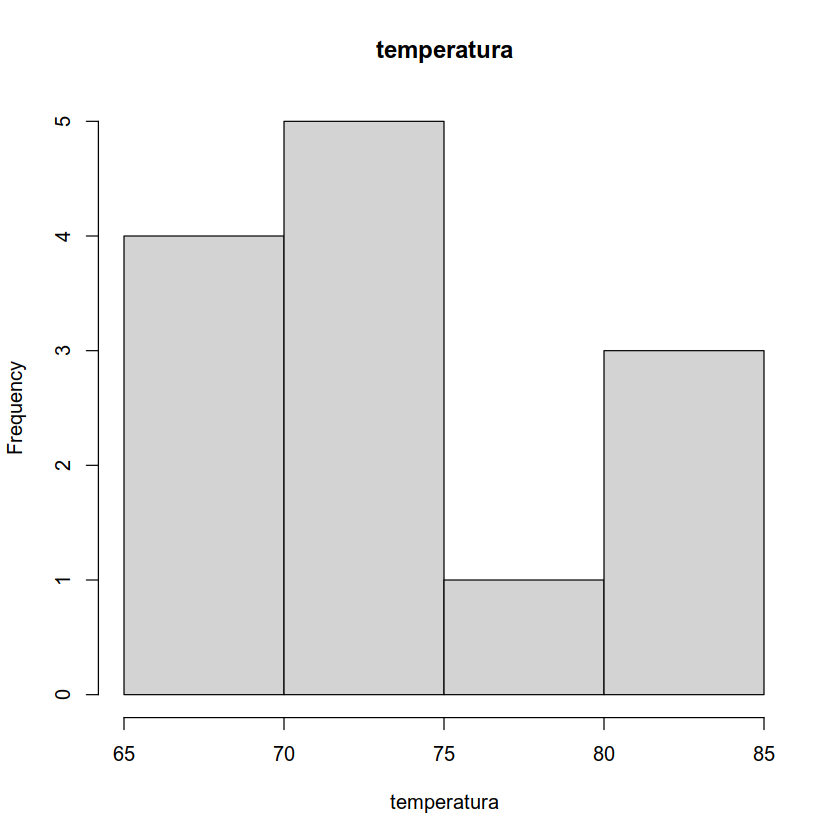

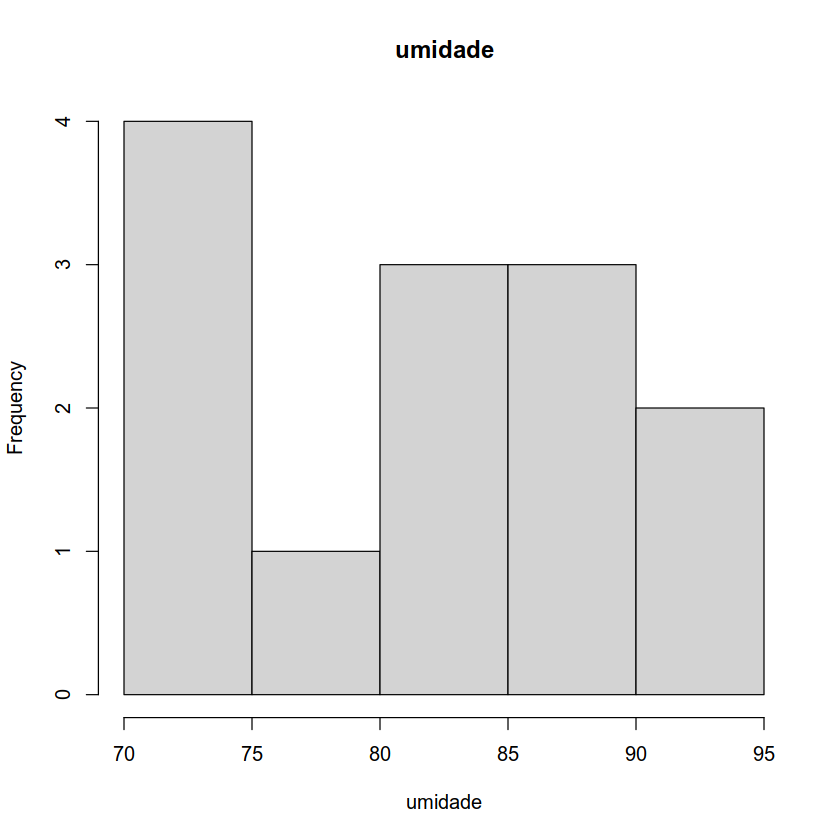

In [23]:
# visualizando frequencias dos atributos numericos
hist(dados2$Temperatura, main = 'temperatura', xlab = 'temperatura')
hist(dados2$Umidade, main = 'umidade', xlab = 'umidade')

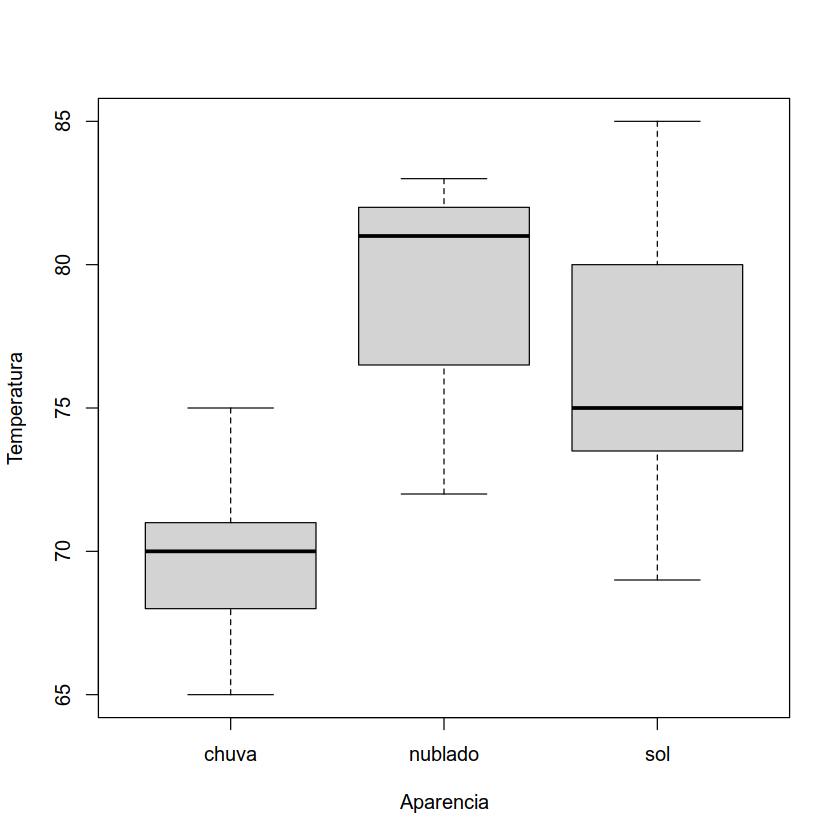

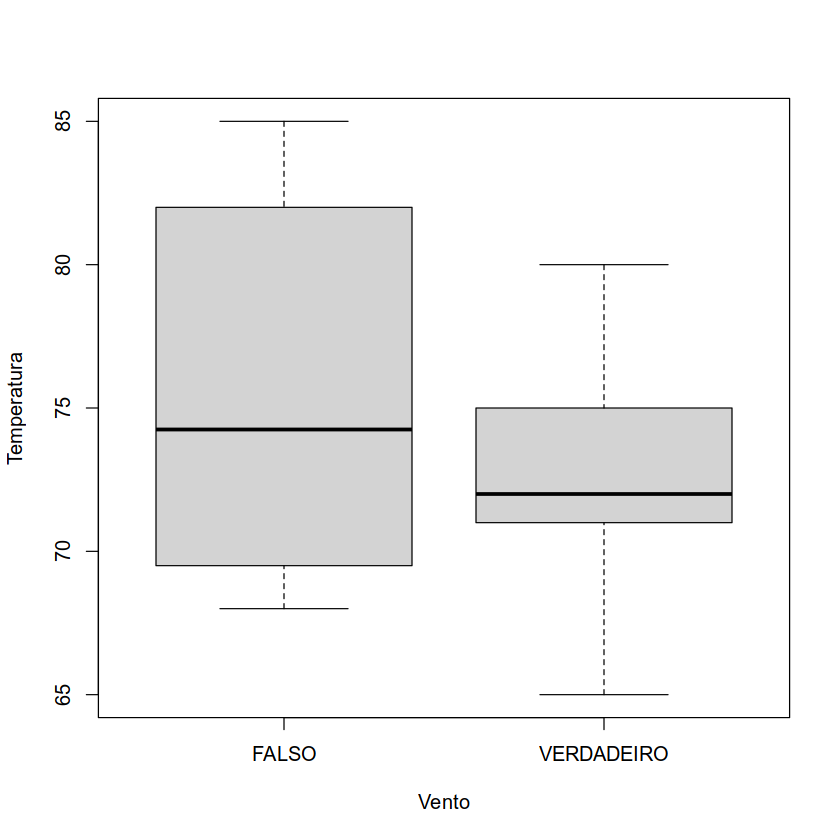

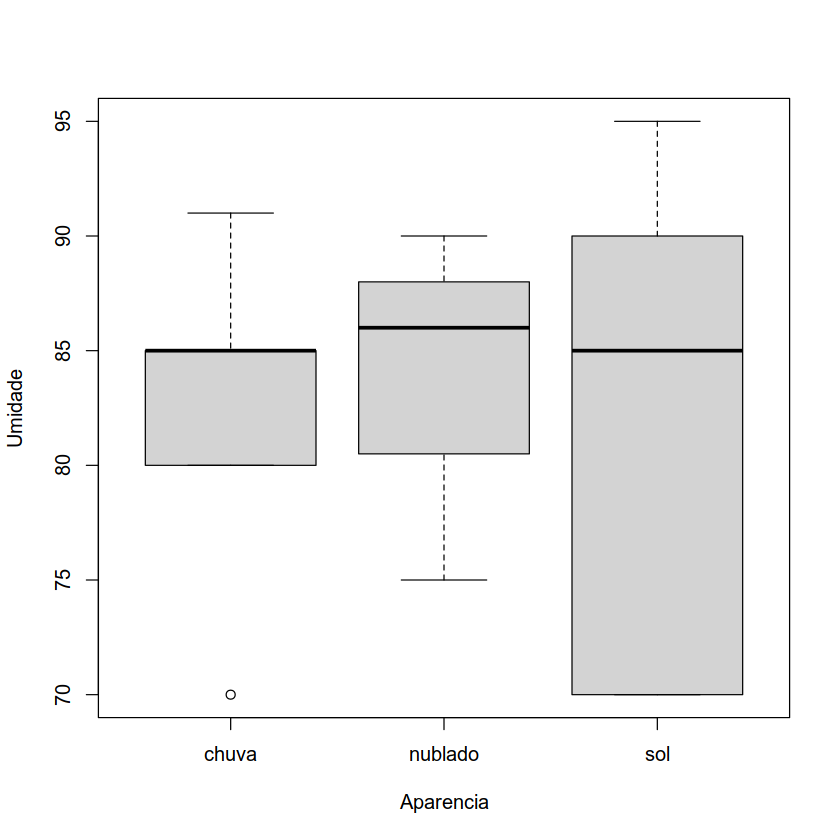

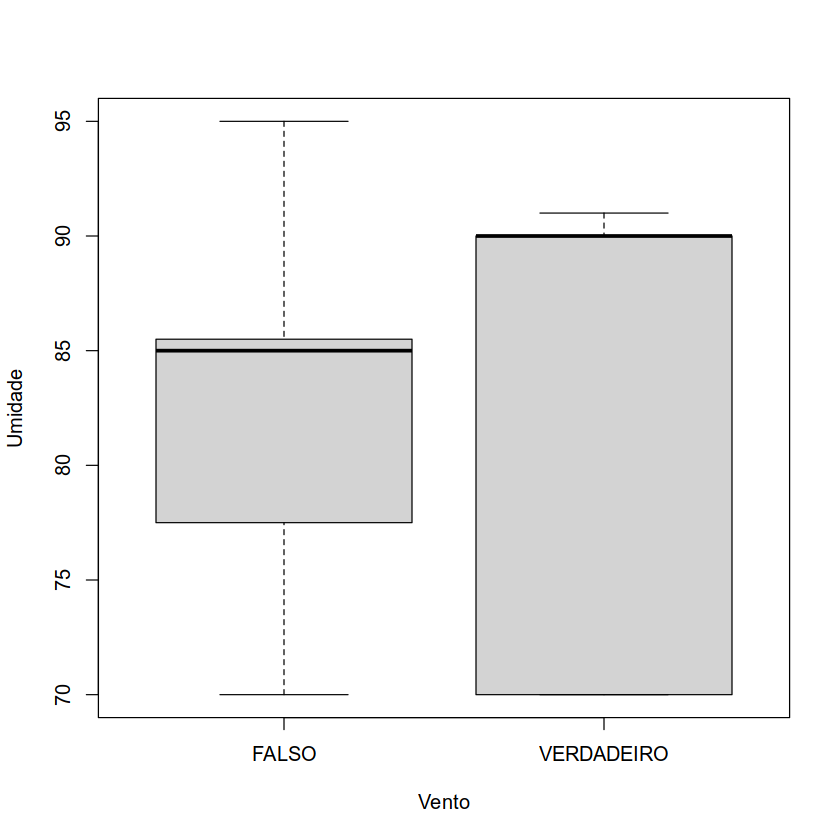

In [24]:
# 
boxplot(Temperatura ~ Aparencia, data = dados2)
boxplot(Temperatura ~ Vento, data = dados2)
boxplot(Umidade ~ Aparencia, data = dados2)
boxplot(Umidade ~ Vento, data = dados2)

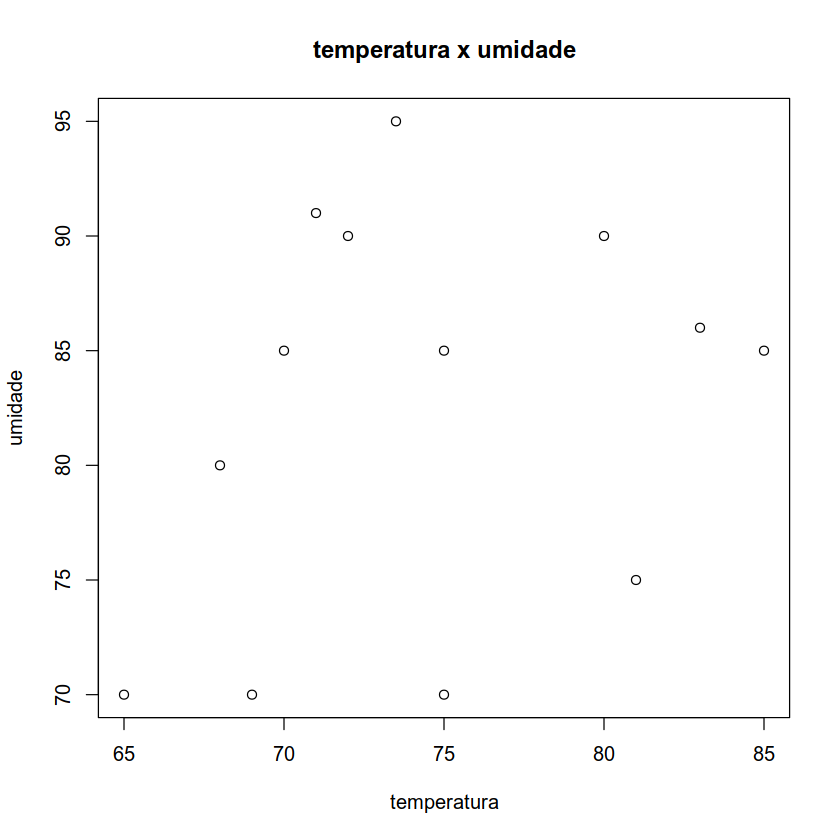

In [25]:
# visualisando relações entre as variaveis temperatura x umidade
plot(dados2$Temperatura, dados2$Umidade, main = 'temperatura x umidade', xlab = 'temperatura', ylab = 'umidade')

In [26]:
# visualizando correlaçao entre as variaveis temperatura x umidade
cor(dados2$Temperatura, dados2$Umidade, use = 'complete.obs')

[1] 0.2720489

## exportando dataset

In [28]:
# exportando csv para diretorio com datasets
write.csv(dados2, file='../data/tempo_tratado.csv', row.names=FALSE)